## EDA 1

### Bike Details datasett>>


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [45]:
df1 = pd.read_csv("BIKE_DETAILS.csv")

In [46]:
df1

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1056  1st owner     500000            52000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[1061 rows x 7 columns]

In [47]:
df1.shape


(1061, 7)

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [49]:
df1.describe()

selling_price         year      km_driven  ex_showroom_price
count    1061.000000  1061.000000    1061.000000       6.260000e+02
mean    59638.151744  2013.867107   34359.833176       8.795871e+04
std     56304.291973     4.301191   51623.152702       7.749659e+04
min      5000.000000  1988.000000     350.000000       3.049000e+04
25%     28000.000000  2011.000000   13500.000000       5.485200e+04
50%     45000.000000  2015.000000   25000.000000       7.275250e+04
75%     70000.000000  2017.000000   43000.000000       8.703150e+04
max    760000.000000  2020.000000  880000.000000       1.278000e+06

#### Ques. What is the range of selling price in the dataset?

In [50]:
SP_Range = (df1["selling_price"].max() - df1["selling_price"].min())
print(f"The Range of selling price is {SP_Range}")

The Range of selling price is 755000


#### Ques. What is the median selling price for bikes in the dataset?

In [51]:
df1["selling_price"].median()

np.float64(45000.0)

#### Ques. What is the most common seller type?


In [52]:
df1["seller_type"].mode()[0]


'Individual'

<Axes: xlabel='seller_type'>

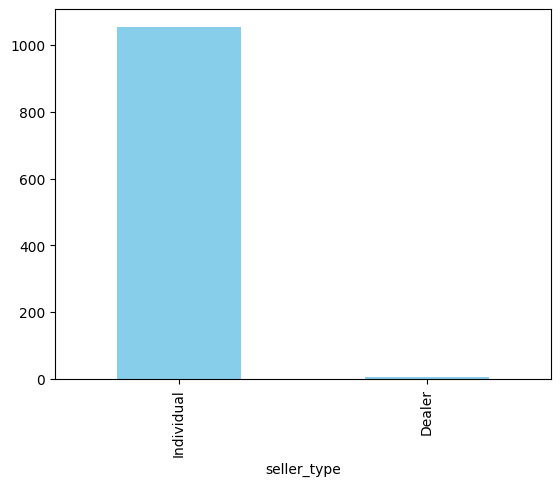

In [53]:
df1["seller_type"].value_counts().plot(color = "skyblue", kind = 'bar')

In [54]:
df1["seller_type"].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

#### Ques. How many bikes have driven more than 50,000 kilometers?


In [55]:
df1[df1["km_driven"]>50000]

name  selling_price  year seller_type  \
5                  Honda CB Twister          18000  2010  Individual   
15    Suzuki Access 125 [2007-2016]          25000  2012  Individual   
20             Hero Passion Pro 110          15000  2008  Individual   
31          Yamaha FZ S [2012-2016]          38000  2013  Individual   
43                Hero Passion XPro          28000  2012  Individual   
...                             ...            ...   ...         ...   
1049            Hero Super Splendor          20000  2007  Individual   
1050               Bajaj Pulsar 150          20000  2010  Individual   
1056                      Activa 3g          17000  2010  Individual   
1059                 Honda CB Shine          12000  2009  Individual   
1060               Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
5     1st owner      60000            53857.0  
15    1st owner      55000            58314.0  
20    1st owner      60000                NaN  
31    1st owner      75000            79432.0  
43    1st owner      81000            56750.0  
...         ...        ...                ...  
1049  1st owner      55000            57000.0  
1050  1st owner      60000            75000.0  
1056  1st owner     500000            52000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[170 rows x 7 columns]

In [56]:
len(df1[df1["km_driven"]>50000])

170

#### Ques.What is the average km_driven value for each ownership type?


In [57]:
df1.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [58]:
df1.groupby("owner")["km_driven"].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

#### Ques. What proportion of bikes are from the year 2015 or older?



In [59]:
old_bikes = len(df1[df1['year']<=2015])
old_bikes

601

In [60]:
total_bikes = df1.shape[0]
total_bikes

1061

In [61]:
proportion = old_bikes / total_bikes
print("Proportion of bikes from 2025 or older:", proportion)
print("Percentage of bikes from 2025 or older:", proportion*100)

Proportion of bikes from 2025 or older: 0.5664467483506126
Percentage of bikes from 2025 or older: 56.64467483506126


#### Ques. What is the trend of missing values across the dataset?


In [62]:
df1.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

#### Ques. What is the highest ex-showroom price recorded, and for which bike?

In [63]:
max_price = df1["ex_showroom_price"].max()
max_price_bike = df1[df1["ex_showroom_price"]== max_price]["name"].values[0]
print(f"Highest ex-showroom price is {max_price} for the bike: {max_price_bike}")

Highest ex-showroom price is 1278000.0 for the bike: Harley-Davidson Street Bob


#### Ques. What is the total number of bikes listed by each seller type?

In [64]:
seller_counts = df1["seller_type"].value_counts()
seller_counts

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

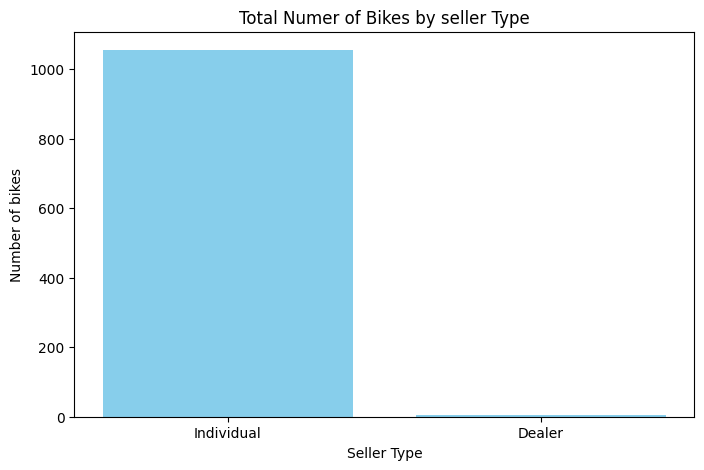

In [65]:
plt.figure(figsize = (8,5))
plt.bar(seller_counts.index , seller_counts.values, color = 'skyblue')
plt.title("Total Numer of Bikes by seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Number of bikes")
plt.show()

#### QuesWhat is the relationship between selling_price and km_driven for first-owner bikes.

In [66]:
df1.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [67]:
df1['owner'].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [68]:
first_owner_bike = df1[df1["owner"]== "1st owner"]
first_owner_bike

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
5                        Honda CB Twister          18000  2010  Individual   
...                                   ...            ...   ...         ...   
1055                        Bajaj  ct 100          18000  2017  Individual   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
5     1st owner      60000            53857.0  
...         ...        ...                ...  
1055  1st owner      35000            32000.0  
1056  1st owner     500000            52000.0  
1057  1st owner      33000            51000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[924 rows x 7 columns]

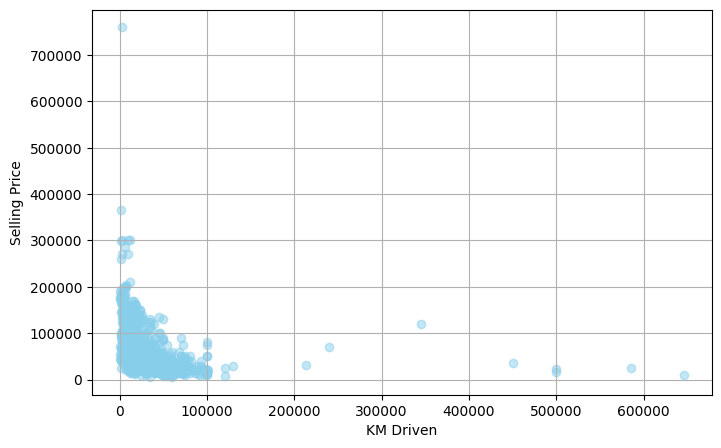

In [69]:
plt.figure(figsize = (8,5))
plt.scatter(first_owner_bike['km_driven'], first_owner_bike["selling_price"], alpha=0.5, color = "skyblue")
plt.xlabel("KM Driven")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()


#### Ques. Identify and remove outliers in the km_driven column using the IQR method?

In [70]:
df1["km_driven"]

0          350
1         5650
2        12000
3        23000
4        21000
         ...  
1056    500000
1057     33000
1058     35000
1059     53000
1060     92233
Name: km_driven, Length: 1061, dtype: int64

In [71]:
Q1 = df1["km_driven"].quantile(0.25)
Q3 = df1["km_driven"].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+ 1.5 * IQR

#filter dataframe to remove outliers>>
df1_no_outliers = df1[(df1["km_driven"] >= lower_bound) & (df1["km_driven"] <= upper_bound)]

In [72]:
df1=df1_no_outliers

In [73]:
df1

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1054                     Hero  CBZ Xtreme          20000  2010  Individual   
1055                        Bajaj  ct 100          18000  2017  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1054  1st owner      50000            78700.0  
1055  1st owner      35000            32000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  

[1022 rows x 7 columns]

#### Ques. Perform a bivariate analysis to visualize the relationship between year and selling_price.

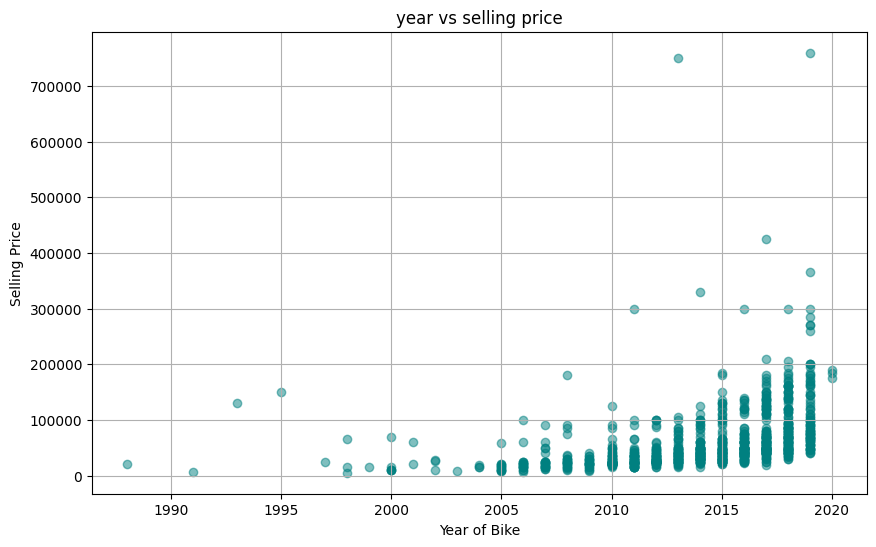

In [74]:
plt.figure(figsize = (10,6))
plt.scatter(df1["year"], df1["selling_price"], alpha =0.5, color ='teal')
plt.xlabel("Year of Bike")
plt.ylabel("Selling Price")
plt.title("year vs selling price")
plt.grid(True)
plt.show()

#### Ques .What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

In [75]:
df1.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [76]:
df1

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1054                     Hero  CBZ Xtreme          20000  2010  Individual   
1055                        Bajaj  ct 100          18000  2017  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1054  1st owner      50000            78700.0  
1055  1st owner      35000            32000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  

[1022 rows x 7 columns]

In [77]:
import datetime
current_year = datetime.datetime.now().year
print(current_year)

2025


In [78]:
df1['age']= current_year - df1["year"]

In [79]:
avg_depreciation = df1.groupby("age")['selling_price'].mean().reset_index()
avg_depreciation.columns = ["age", "average_Selling_price"]
print(avg_depreciation)

    age  average_Selling_price
0     5          183333.333333
1     6          119689.511628
2     7           87660.374046
3     8           78962.121212
4     9           57924.126214
5    10           56313.131313
6    11           49121.348315
7    12           51802.816901
8    13           36157.560606
9    14           35931.017241
10   15           32350.877193
11   16           22934.782609
12   17           36404.000000
13   18           27768.181818
14   19           23821.052632
15   20           16978.571429
16   21           16000.000000
17   22            8000.000000
18   23           20666.666667
19   24           40000.000000
20   25           20833.333333
21   26           15000.000000
22   27           28333.333333
23   28           25000.000000
24   30          150000.000000
25   32          130000.000000
26   34            6000.000000
27   37           20000.000000


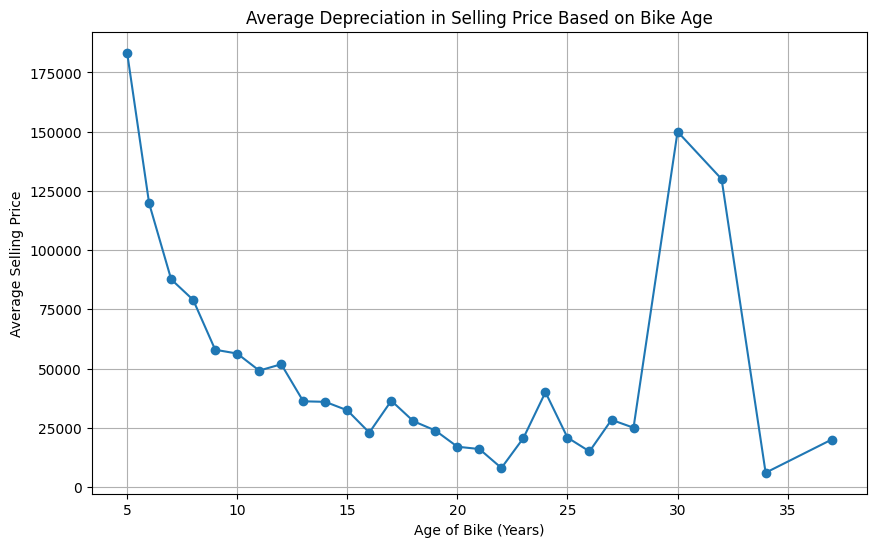

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(avg_depreciation['age'], avg_depreciation['average_Selling_price'], marker='o')
plt.title('Average Depreciation in Selling Price Based on Bike Age')
plt.xlabel('Age of Bike (Years)')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()


#### Ques.8 Which bike names are priced significantly above the average price for their manufacturing year.

In [81]:
average_price = df1.groupby("year")["selling_price"].mean().reset_index()
average_price.columns = ["year", "average_price"]
print(average_price)

    year  average_price
0   1988   20000.000000
1   1991    6000.000000
2   1993  130000.000000
3   1995  150000.000000
4   1997   25000.000000
5   1998   28333.333333
6   1999   15000.000000
7   2000   20833.333333
8   2001   40000.000000
9   2002   20666.666667
10  2003    8000.000000
11  2004   16000.000000
12  2005   16978.571429
13  2006   23821.052632
14  2007   27768.181818
15  2008   36404.000000
16  2009   22934.782609
17  2010   32350.877193
18  2011   35931.017241
19  2012   36157.560606
20  2013   51802.816901
21  2014   49121.348315
22  2015   56313.131313
23  2016   57924.126214
24  2017   78962.121212
25  2018   87660.374046
26  2019  119689.511628
27  2020  183333.333333


In [82]:
df1 = df1.merge(average_price, on="year", how="left")


In [83]:
df1.rename(columns = {"average_price": "average_price_foryear"})

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1017                     Hero  CBZ Xtreme          20000  2010  Individual   
1018                        Bajaj  ct 100          18000  2017  Individual   
1019                     Honda CB twister          16000  2012  Individual   
1020                   Bajaj Discover 125          15000  2013  Individual   
1021                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_showroom_price  age  average_price_foryear  
0     1st owner        350                NaN    6          119689.511628  
1     1st owner       5650                NaN    8           78962.121212  
2     1st owner      12000           148114.0    7           87660.374046  
3     1st owner      23000            89643.0   10           56313.131313  
4     2nd owner      21000                NaN   14           35931.017241  
...         ...        ...                ...  ...                    ...  
1017  1st owner      50000            78700.0   15           32350.877193  
1018  1st owner      35000            32000.0    8           78962.121212  
1019  1st owner      33000            51000.0   13           36157.560606  
1020  2nd owner      35000            57000.0   12           51802.816901  
1021  1st owner      53000            58000.0   16           22934.782609  

[1022 rows x 9 columns]

In [84]:
df1.drop(columns = ["average_price_x", "average_price_y"], inplace = True)

KeyError: "['average_price_x', 'average_price_y'] not found in axis"

In [ ]:
expensive_bikes = df1[df1["selling_price"]>= df1["average_price"]]
significantly_priced_bikes = expensive_bikes["name"].unique()
print(significantly_priced_bikes)

#### Ques.Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [ ]:
df1.columns

In [ ]:
numeric_df = df1.select_dtypes(include = ["number"])
corr_matrix = numeric_df.corr()

plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = '.2f')
plt.title("Correation Matrix Heatmap")
plt.show()

# DATASET -2 (CAR SALE DATASET)

In [ ]:
df2 = pd.read_csv("Car_Sale.csv")

In [ ]:
df2

In [ ]:
df2.info()

In [ ]:
df2.isnull().sum()

In [ ]:
df2.describe()

#### Ques. What is the average selling price of cars for each dealer, and how does it compare across different dealers.

In [ ]:
df2.columns

In [ ]:
df2.columns = df2.columns.str.strip()

In [ ]:
dealer_avg_price = df2.groupby("Dealer_Name")["Price ($)"].mean().reset_index()
dealer_avg_price.rename(columns = {"Price ($)": "Average_Price"}, inplace = True)

In [ ]:
dealer_avg_price

#### Ques. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

In [ ]:
df2.columns

In [ ]:
price_variation = df2.groupby("Company")["Price ($)"].std().reset_index()
price_variation.rename(columns = {"Price ($)": "Price_StdDev"}, inplace = True) 

In [ ]:
price_variation.sort_values(by = "Price_StdDev", ascending = False).head(1)

#### Ques. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

In [ ]:
df2.columns

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Transmission', y= 'Price ($)', data=df2)
plt.title("Distribution of Car Prices by Transmission Type")
plt.ylabel("Price($)")
plt.xticks(rotation = 0)
plt.show()

In [ ]:
iqr_data = df2.groupby("Transmission")["Price ($)"].describe()[['25%', "75%"]]
iqr_data.columns = ['Q1', "Q3"]
iqr_data['IQR'] = iqr_data['Q3']- iqr_data['Q1']
print(iqr_data)


#### Ques.What is the distribution of car prices across different regions.


In [ ]:
plt.figure(figsize =(12,6))
sns.boxplot(x = "Dealer_Region" , y = "Price ($)" , data = df2)
plt.title("Distribution of Price by Dealer_Region")
plt.xlabel("Dealer_Region")
plt.ylabel("Price ($)")
plt.show()

#### Ques.What is the distribution of cars based on body styles.


In [ ]:
df2.Company

In [ ]:
df2["Body Style"]

In [ ]:
crosstab = pd.crosstab(df2['Body Style'], df2['Company'])

crosstab.plot(kind = 'bar', stacked = True, figsize =(20,10), colormap = 'tab20')
plt.ylabel("Number of Cars")
plt.tight_layout()
plt.show()

#### Ques.How does the average selling price of cars vary by customer gender and annual income


In [ ]:
# Multivariate Visualization>>

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Annual Income', y = 'Price ($)', data =df2, hue = 'Gender')
plt.title("Price vs Annual Income by Gender")
plt.show()

In [ ]:
sns.lmplot(data=df2, x='Annual Income', y='Price ($)', hue='Gender', height=6, aspect=1.5)
plt.title('Trend: Price vs Annual Income by Gender')
plt.show()


#### Ques.What is the distribution of car prices by region, and how does the number of cars sold vary by region.


In [ ]:
df2.Dealer_Region.value_counts()

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Dealer_Region', y= 'Price ($)', data =df2)
plt.title("Distribution of Car price by Dealer_Region")
plt.show()

#### Ques. How does the average car price differ between cars with different engine sizes.

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Engine', y ='Price ($)', data = df2)
plt.title("Average Car Price by Engine")
plt.xlabel("Engine")
plt.ylabel("Price ($)")
plt.show()

#### Ques. How do car prices vary based on the customer‚Äôs annual income bracket.

In [ ]:
#create income bracket>>
df2["Income Range"].unique()

In [ ]:
sns.barplot(data=df2, x='Income Range', y='Price ($)', palette='viridis')
plt.title("Car Price by Income Bracket")
plt.ylabel(" Price ($)")
plt.xlabel("Annual Income Bracket")
plt.xticks(rotation=45)
plt.show()


#### Ques.What are the top 5 car models with the highest number of sales, and how does their price distribution look.

In [ ]:
df2.columns

In [ ]:
top5_models = df2.Model.value_counts().head(5).index
top5_models

In [ ]:
top_models_df = df2[df2['Model'].isin(top5_models)]
top_models_df

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Model', y= 'Price ($)', data = top_models_df)
plt.title("Price Distribution of Top 5 Selling Car MOdels")
plt.xticks(rotation = 30)
plt.show()

#### Ques.How does car price vary with engine size across different car colors, and which colors have the highest price variation

In [ ]:
df2.Engine.value_counts()

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Engine', y = 'Price ($)', hue = 'Color', data = df2)
plt.show()

#### which color has the highest price variation>>
For Engine "Double√Ç Overhead Camshaft" >> White Pale is the leading color
For Overhead Camshaft>> Black color car is preferred over any color.

#### Ques.Is there any seasonal trend in car sales based on the date of sale.

In [ ]:
df2.columns

In [ ]:
df2

In [ ]:
date_wise_sales = df2.groupby('Date')['Price ($)'].sum().reset_index()
date_wise_sales.columns = ['Date','Total_Sales']
final_df = pd.DataFrame(date_wise_sales)
final_df

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Date', y = 'Total_Sales', data =final_df)
plt.show()

we can see multiple sharp peaks - around dates like day 5, 8, 12, 18 and 26. These could indicate: 
Special discount days
End of week or end of month buying, maybe weekend effects
Since we're plotting daily data, we might expect some sort of weekly trend (like higher sales on weekends). But here, no obvious 7-day cycle is visible. This could mean Sales are not dependent on weekday/weekend.

#### Ques.  How does the car price distribution change when considering different combinations of body style and transmission type.

In [ ]:
df2.columns

In [ ]:
df2.Transmission

In [ ]:
df2['Body Style']

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x ='Body Style', y= 'Price ($)', hue = 'Transmission',data = df2)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Ques.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact.

In [ ]:
df2.groupby('Transmission')[['Price ($)', 'Annual Income']].corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the whole plot
plt.figure(figsize=(12, 6))

# Use hue to separate transmission types
sns.lmplot(
    x='Annual Income',
    y='Price ($)',
    hue='Transmission',
    data=df2,
    aspect=2,
    height=6,#it means that if u have 6 units tall , and 6*2 = 12 units wide
    markers=['o', 'x'],  # different marker for each group
    palette='Set2',
    ci=None  # Remove confidence interval to focus on trend
)

plt.title('Relationship between Price and Annual Income by Transmission Type')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()


#### Ques. How does the average car price vary across different car models and engine types?

In [ ]:
df2['Engine'].value_counts()

In [ ]:
df2['Model']

In [ ]:
avg_price = df2.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
avg_price.sort_values(by = 'Price ($)', ascending = False)
avg_price

In [ ]:
top_models = avg_price.head(15)  # Show only top 15 expensive combinations

plt.figure(figsize=(14, 6))
sns.barplot(data=top_models, x='Model', y='Price ($)', hue='Engine')
plt.title("Top 15 Car Models by Average Price across Engine Types")
plt.xticks(rotation=45)
plt.show()


# DATASET - 3(Amazon Sales Data)

In [86]:
df3 = pd.read_csv("amazon.csv")
df3

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ‚Çπ399   
1     Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
2     Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
3     Computers&Accessories|Accessories&Peripherals|...             ‚Çπ329   
4     Computers&Accessories|Accessories&Peripherals|...             ‚Çπ154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ‚Çπ379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ‚Çπ2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ‚Çπ2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ‚Çπ1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ‚Çπ2,863   

     actual_price discount_percentage rating rating_count  \
0          ‚Çπ1,099                 64%    4.2       24,269   
1            ‚Çπ349                 43%    4.0       43,994   
2          ‚Çπ1,899                 90%    3.9        7,928   
3            ‚Çπ699                 53%    4.2       94,363   
4            ‚Çπ399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ‚Çπ919                 59%      4        1,090   
1461       ‚Çπ3,045                 25%    4.1        4,118   
1462       ‚Çπ3,080                 28%    3.6          468   
1463       ‚Çπ1,890                 26%      4        8,031   
1464       ‚Çπ3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification √¢‚Ç¨‚Äú 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                        

In [87]:
df_copy=df3

In [88]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [89]:
df_copy


product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ‚Çπ399   
1     Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
2     Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
3     Computers&Accessories|Accessories&Peripherals|...             ‚Çπ329   
4     Computers&Accessories|Accessories&Peripherals|...             ‚Çπ154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ‚Çπ379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ‚Çπ2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ‚Çπ2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ‚Çπ1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ‚Çπ2,863   

     actual_price discount_percentage rating rating_count  \
0          ‚Çπ1,099                 64%    4.2       24,269   
1            ‚Çπ349                 43%    4.0       43,994   
2          ‚Çπ1,899                 90%    3.9        7,928   
3            ‚Çπ699                 53%    4.2       94,363   
4            ‚Çπ399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ‚Çπ919                 59%      4        1,090   
1461       ‚Çπ3,045                 25%    4.1        4,118   
1462       ‚Çπ3,080                 28%    3.6          468   
1463       ‚Çπ1,890                 26%      4        8,031   
1464       ‚Çπ3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification √¢‚Ç¨‚Äú 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                        

In [90]:
df3['discounted_price'] = df3['discounted_price'].str.replace('‚Çπ', "")
df3['actual_price'] = df3['actual_price'].str.replace('‚Çπ', "").str.replace(',', "")
df3['discount_percentage'] = df3['discount_percentage'].str.replace('%', '')
df3['rating_count'] = df3['rating_count'].str.replace(',','')

In [91]:
df3

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...              399   
1     Computers&Accessories|Accessories&Peripherals|...              199   
2     Computers&Accessories|Accessories&Peripherals|...              199   
3     Computers&Accessories|Accessories&Peripherals|...              329   
4     Computers&Accessories|Accessories&Peripherals|...              154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...              379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...            2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...            1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            2,863   

     actual_price discount_percentage rating rating_count  \
0            1099                  64    4.2        24269   
1             349                  43    4.0        43994   
2            1899                  90    3.9         7928   
3             699                  53    4.2        94363   
4             399                  61    4.2        16905   
...           ...                 ...    ...          ...   
1460          919                  59      4         1090   
1461         3045                  25    4.1         4118   
1462         3080                  28    3.6          468   
1463         1890                  26      4         8031   
1464         3690                  22    4.3         6987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification √¢‚Ç¨‚Äú 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gu

In [92]:
df3.describe()

product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B08WRWPM22  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...              199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top             999                  50    4.1         9378   
freq            120                  56    244            9   

                                            about_product  \
count                                                1465   
unique                                               1293   
top     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
freq                                                    6   

                                                  user_id  \
count                                                1465   
unique                                               1194   
top     AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
freq                                                   10   

                                                user_name  \
count                                                1465   
unique                                               1194   
top     $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...   
freq                                                   10   

                                                review_id  \
count                                                1465   
unique                                               1194   
top     R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...   
freq                                                   10   

                                             review_title  \
count                                                1465   
unique                                               1194   
top     Worked on iPhone 7 and didn‚Äôt work on XR,Good ...   
freq                                                   10   

                                           review_content  \
count                                                1465   
unique                                               1212   
top     I am not big on camera usage, personally. I wa...   
freq                                                    8   

                                                 img_link  \
count                                                1465   
unique                                               1412   
top     https://m.media-amazon.com/images/I/413sCRKobN...   
freq                                                    3   

                                             product_link  
count                                                1465  
unique                                               1465  
top     https://www.amazon.in/Borosil-Jumbo-1000-Watt-...  
freq                                                    1

#### Ques. What is the average rating for each product category?

In [93]:
df3.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [94]:
df3.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [95]:
df3['rating'] = pd.to_numeric(df3['rating'], errors = 'coerce')

In [96]:
average_rating_per_category = df3.groupby('category')['rating'].mean()

print(average_rating_per_category)


category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

#### Ques. What are the top rating_count products by category

In [97]:
df3['rating_count'].unique()

array(['24269', '43994', '7928', ..., '468', '8031', '6987'],
      shape=(1144,), dtype=object)

In [98]:
df3['rating_count'] = pd.to_numeric(df3['rating_count'], errors = 'coerce')
df3['rating_count']

0       24269.0
1       43994.0
2        7928.0
3       94363.0
4       16905.0
         ...   
1460     1090.0
1461     4118.0
1462      468.0
1463     8031.0
1464     6987.0
Name: rating_count, Length: 1465, dtype: float64

In [99]:
top3 = df3.sort_values('rating_count', ascending=False).groupby('category').head(3)
top3

product_id                                       product_name  \
47    B014I8SSD0  Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
65    B014I8SX4Y  Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
12    B07KSMBL2H  AmazonBasics Flexible Premium HDMI Cable (Blac...   
400   B07GQD4K6L  boAt Bassheads 100 in Ear Wired Earphones with...   
352   B07GPXXNNG  boAt Bassheads 100 in Ear Wired Earphones with...   
...          ...                                                ...   
1407  B09P182Z2H  AGARO Glory Cool Mist Ultrasonic Humidifier, 4...   
1450  B0BJYSCWFQ  Kitchengenix's Mini Waffle Maker 4 Inch- 350 W...   
210   B0BLV1GNLN  WZATCO Pixel | Portable LED Projector | Native...   
1222  B0B4SJKRDF  Kitchenwell Multipurpose Portable Electronic D...   
299   B0BNDD9TN6  WANBO X1 Pro (Upgraded) | Native 1080P Full HD...   

                                               category discounted_price  \
47    Electronics|HomeTheater,TV&Video|Accessories|C...              309   
65    Electronics|HomeTheater,TV&Video|Accessories|C...              309   
12    Electronics|HomeTheater,TV&Video|Accessories|C...              219   
400   Electronics|Headphones,Earbuds&Accessories|Hea...              379   
352   Electronics|Headphones,Earbuds&Accessories|Hea...              349   
...                                                 ...              ...   
1407  Home&Kitchen|Heating,Cooling&AirQuality|Humidi...            3,290   
1450  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...              899   
210         Electronics|HomeTheater,TV&Video|Projectors            6,490   
1222  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...              239   
299         Electronics|HomeTheater,TV&Video|Projectors           13,990   

     actual_price discount_percentage  rating  rating_count  \
47            475                  35     4.4      426973.0   
65           1400                  78     4.4      426973.0   
12            700                  69     4.4      426973.0   
400           999                  62     4.1      363713.0   
352           999                  65     4.1      363713.0   
...           ...                 ...     ...           ...   
1407         5799                  43     4.3         168.0   
1450         1999                  55     4.2          39.0   
210          9990                  35     4.0          27.0   
1222          239                   0     4.3           7.0   
299         28900                  52     4.5           7.0   

                                          about_product  \
47    Please select appropriate display resolution &...   
65    HDMI A Male to A Male Cable: Supports Ethernet...   
12    Flexible, lightweight HDMI cable for connectin...   
400   The perfect way to add some style and stand ou...   
352   The perfect way to add some style and stand ou...   
...                                                 ...   
1407  Works on ultrasonic technology to humidify the...   
1450  MORE THAN WAFFLES: Make your favorite breakfas...   
210   üíñ [Small Size but Powerful Effects] 2022 upgra...   
1222  Package : 1 Weighing Scale|Easy To Use|Durable...   
299   ‚úîÔ∏è Powerfully Compact: Wanbo X1 pro boasts inc...   

                                                user_id  \
47    AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...   
65    AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...   
12    AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...   
400   AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...   
352   AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...   
...                                                 ...   
1407  AEOBCJAUHKQ3VOH4XXCLGXUUDXCQ,AFFPSASZUMB7UWM5J...   
1450  AGG6B7ZD5FGH7KFHMESWE3VMHGBQ,AFEETHDN6SAGGKCZI...   
210   AGOYJRXFFVVGZDJTZV474WDLAPUA,AFU33Y7EUIZTFCE3Q...   
1222  AGP5YURZQ6W2GKYILORIGKB3NDUQ,AEPAZYTLJQKDOZBSN...   
299   AGJUSTWREQRCTY3KJHDL6I2MZDTA,AEHIS3XIFCPQPLDPW...   

                                              user_name  \

#### Ques.What is the distribution of discounted prices vs. actual prices.

In [126]:
df3[['actual_price','discounted_price']].describe()

actual_price  discounted_price
count    1465.000000       1465.000000
mean     5444.990635        238.996369
std     10874.826864        284.799760
min        39.000000          0.000000
25%       800.000000          0.000000
50%      1650.000000        150.000000
75%      4295.000000        398.000000
max    139900.000000        999.000000

In [119]:
df3['actual_price'] = pd.to_numeric(df3['actual_price'], errors = 'coerce')
df3['discounted_price'] = pd.to_numeric(df3['discounted_price'], errors = 'coerce')

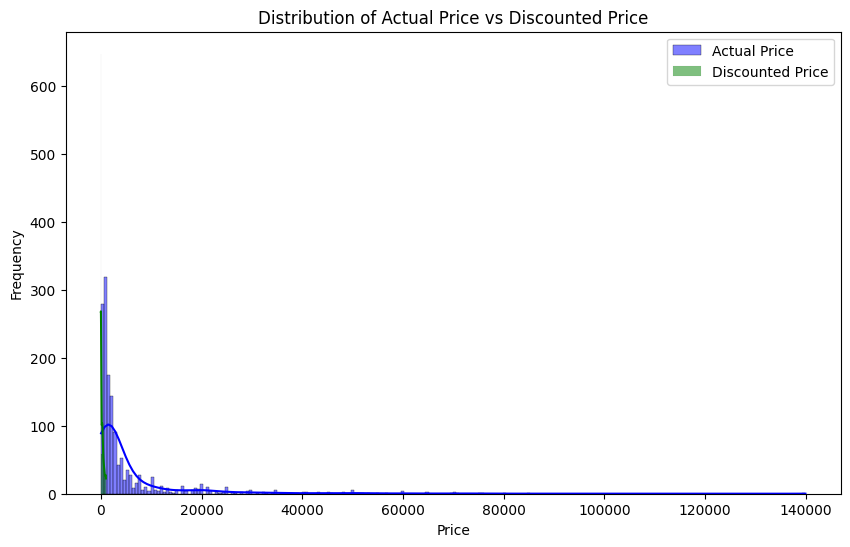

In [129]:
plt.figure(figsize = (10,6))

sns.histplot(df3['actual_price'], color = 'blue', label = 'Actual Price', kde = True)
sns.histplot(df3['discounted_price'], color = 'green', label = 'Discounted Price', kde = True)

plt.legend()
plt.title("Distribution of Actual Price vs Discounted Price")
plt.xlabel("Price")
plt.ylabel('Frequency')
plt.show()

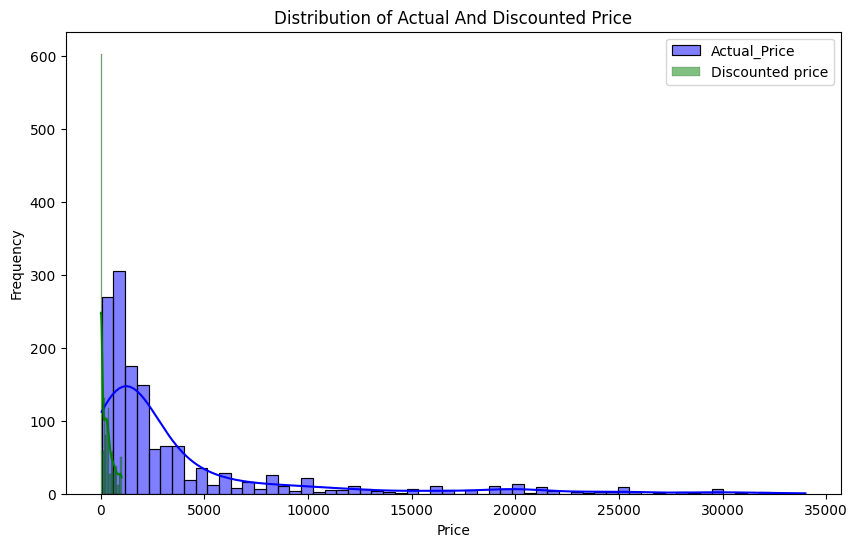

In [134]:
q97 = df3['actual_price'].quantile(0.97)
df_trimmed = df3[df3['actual_price'] <= q97]

plt.figure(figsize = (10,6))
sns.histplot(df_trimmed['actual_price'], color = 'blue', label = 'Actual_Price', kde = True)
sns.histplot(df_trimmed['discounted_price'], color = 'green', label = 'Discounted price', kde = True)

plt.legend()
plt.title("Distribution of Actual And Discounted Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [148]:
q1 = df3['actual_price'].quantile(0.25)
q3 = df3['actual_price'].quantile(0.75)

IQR = q3-q1

lower_bound = q1-IQR*1.5
upper_bound = q3+IQR*1.5

df_no_outliers= df3[(df3['actual_price']>= lower_bound) & (df3['actual_price']<= upper_bound)]

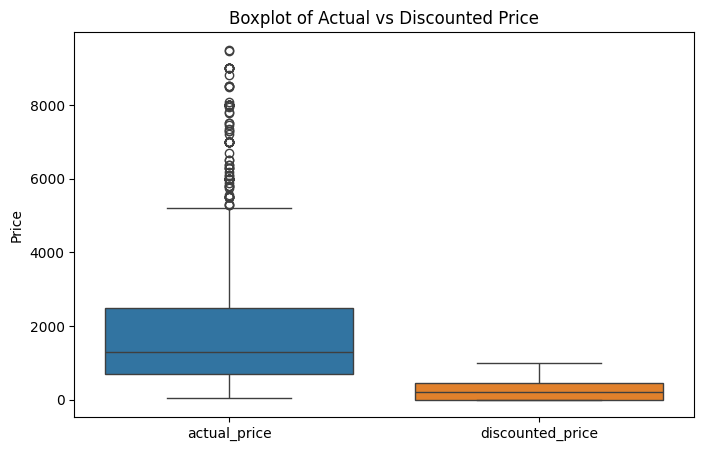

In [149]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_no_outliers[['actual_price', 'discounted_price']])
plt.title('Boxplot of Actual vs Discounted Price')
plt.ylabel('Price')
plt.show()


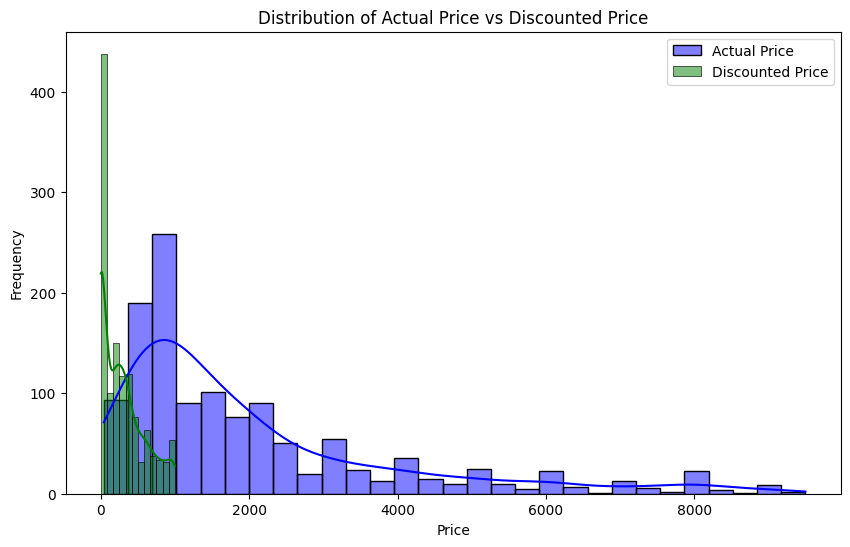

In [150]:
plt.figure(figsize = (10,6))

sns.histplot(df_no_outliers['actual_price'], color = 'blue', label = 'Actual Price', kde = True)
sns.histplot(df_no_outliers['discounted_price'], color = 'green', label = 'Discounted Price', kde = True)

plt.legend()
plt.title("Distribution of Actual Price vs Discounted Price")
plt.xlabel("Price")
plt.ylabel('Frequency')
plt.show()

#### Ques.How does the average discount percentage vary across categories

In [166]:
avg_discount_by_category = df3.groupby('category', as_index=False)['discount_percentage'].mean()
avg_discount_by_category = avg_discount_by_category.sort_values(by='discount_percentage', ascending=False)
avg_discount_by_category.reset_index(drop = True, inplace = True)
avg_discount_by_category


category  discount_percentage
0    Computers&Accessories|Accessories&Peripherals|...                 90.0
1    Electronics|Headphones,Earbuds&Accessories|Ear...                 90.0
2    Electronics|Mobiles&Accessories|MobileAccessor...                 90.0
3    Electronics|Headphones,Earbuds&Accessories|Ada...                 88.0
4    Computers&Accessories|Accessories&Peripherals|...                 87.5
..                                                 ...                  ...
206  OfficeProducts|OfficeElectronics|Calculators|F...                  0.0
207  OfficeProducts|OfficePaperProducts|Paper|Copy&...                  0.0
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  0.0

[211 rows x 2 columns]

#### Ques. What are the most popular product names.

In [179]:
popular_products = df3.groupby('product_name', as_index = False)['rating_count'].sum()
popular_products = popular_products.sort_values(by = 'rating_count', ascending = False)
popular_products.head(10)

product_name  rating_count
101   AmazonBasics Flexible Premium HDMI Cable (Blac...      853945.0
76    Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
75    Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
511   JBL C100SI Wired In Ear Headphones with Mic, J...      385177.0
1257  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
1256  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
1253  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
900   Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
898   Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
901   Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...      313832.0

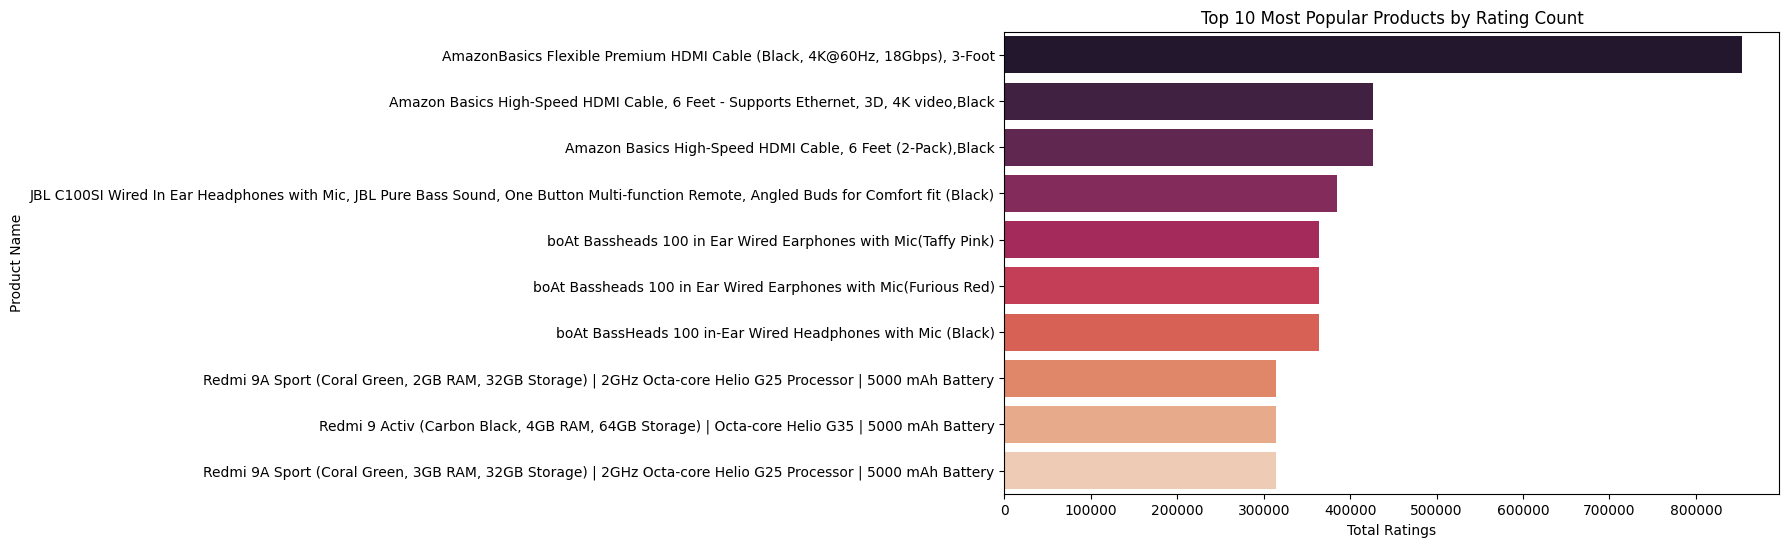

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=popular_products.head(10), x='rating_count', y='product_name', palette='rocket')
plt.title('Top 10 Most Popular Products by Rating Count')
plt.xlabel('Total Ratings')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


#### Ques6. What are the most popular product keywords.

In [233]:
df3.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'clean_name'],
      dtype='object')

In [238]:
from collections import Counter
import re

words = []

for name in df3['product_name'].dropna():
    tokens = re.findall(r'\b[a-z]{3,}\b', name.lower())
    words.extend(tokens)

word_counts = Counter(words)

keywords_df = pd.DataFrame(word_counts.most_common(20), columns = ['Keyword', 'Frequency'])
keywords_df

Keyword  Frequency
0         with        752
1          for        674
2        black        530
3          usb        417
4        cable        414
5          and        331
6     charging        247
7         type        243
8         fast        212
9        smart        175
10       white        170
11  compatible        146
12        data        136
13         led        129
14         pro        125
15    wireless        119
16       water        114
17      remote        109
18      heater        108
19   bluetooth        107

In [243]:
stopwords = {'with', 'for', 'and', 'from', 'the', 'your', 'you'}
filtered_words = [w for w in words if w not in stopwords]
filtered_words[:20]

['wayona',
 'nylon',
 'braided',
 'usb',
 'lightning',
 'fast',
 'charging',
 'data',
 'sync',
 'cable',
 'compatible',
 'iphone',
 'ipad',
 'air',
 'pro',
 'mini',
 'pack',
 'grey',
 'ambrane',
 'unbreakable']

#### Ques. What are the most popular product reviews.

In [245]:
#let's find N products by rating_count

top_products = df3.sort_values('rating_count', ascending = False)

popular_reviews = top_products[['product_name', 'review_title', 'review_content', 'rating_count']].head(10)
print(popular_reviews)

                                          product_name  \
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
12   AmazonBasics Flexible Premium HDMI Cable (Blac...   
684  AmazonBasics Flexible Premium HDMI Cable (Blac...   
400  boAt Bassheads 100 in Ear Wired Earphones with...   
352  boAt Bassheads 100 in Ear Wired Earphones with...   
584  boAt BassHeads 100 in-Ear Wired Headphones wit...   
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...   
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...   
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...   

                                          review_title  \
47   It's quite good and value for money,Works well...   
65   It's quite good and value for money,Works well...   
12   It's quite good and value for money,Works well...   
684  It's quite good and value for money,Works well...   
400  Best value for money,HEAD PHONE POUCH NOT RECE...   
352  Best val

#### Ques.What is the correlation between discounted_price and rating.

In [250]:
# Clean and convert discounted_price and rating to numeric
df3['discounted_price'] = df3['discounted_price'].astype(str).str.replace(',', '')
df3['rating'] = df3['rating'].astype(str)

df3['discounted_price'] = pd.to_numeric(df3['discounted_price'], errors='coerce')
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')

# Drop rows where either value is NaN
clean_df = df3.dropna(subset=['discounted_price', 'rating'])

# Calculate correlation
correlation = clean_df['discounted_price'].corr(clean_df['rating'])

print(f"Correlation between discounted_price and rating: {correlation:.4f}")


Correlation between discounted_price and rating: 0.0165


#### Ques.What are the Top 5 categories based on the highest ratings.

In [254]:
popular_category = top_products[['category', 'rating_count']]
popular_category.head(5)


category  rating_count
47   Electronics|HomeTheater,TV&Video|Accessories|C...      426973.0
65   Electronics|HomeTheater,TV&Video|Accessories|C...      426973.0
12   Electronics|HomeTheater,TV&Video|Accessories|C...      426973.0
684  Electronics|HomeTheater,TV&Video|Accessories|C...      426972.0
400  Electronics|Headphones,Earbuds&Accessories|Hea...      363713.0

#### Ques. Identify any potential areas for improvement or optimization based on the data analysis

Consider including long-tail keywords like "fast charging nylon braided usb cable for iPhone" to improve SEO and reduce competition.
No Android-related keywords like "Type-C", "micro USB", "Samsung", "realme", etc.Expand product titles/descriptions to include Android-compatible terms if applicable.

Observation: Steep discounts are compressing prices too much ‚Äî perhaps overly aggressive.Optimization:
Perform profit-margin analysis to ensure you're not underpricing.


# DATASET-4 (SPOTIFY)

In [256]:
df4 = pd.read_csv("spotify.csv")

In [257]:
df4

Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6  
1            91         173986  1zi7xx7UVEFkmKfv06H8x0  
2            90         260111  2YSzYUF3jWqb9YP9VXmpjE  
3            88         247444  7aqfrAY2p9BUSiupwk3svU  
4            88         218364  3F5CgOj3wFlRv51JsHbxhe  
..          ...            ...                     ...  
435          44         221863  3fBsEOnzwtlkpS0LxXAZhN  
436          64         191900  7Ezwtgfw7khBrpvaNPtMoT  
437          69         283693  7xVLFuuYdAvcTfcP3IG3dS  
438          65         220408  4hGmQboiou09EwhcTWa0H6  
439          68         267720  0nq6sfr8z1R5KJ4XUk396e  

[440 rows x 5 columns]

In [258]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [259]:
df4.describe()

Popularity  Duration (ms)
count  440.000000     440.000000
mean    75.736364  206810.040909
std      9.886534   53576.930289
min     29.000000   81666.000000
25%     70.000000  172778.500000
50%     77.000000  201866.000000
75%     83.000000  235119.750000
max     97.000000  501648.000000

#### Ques. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

In [260]:
df4.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

#### Ques.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

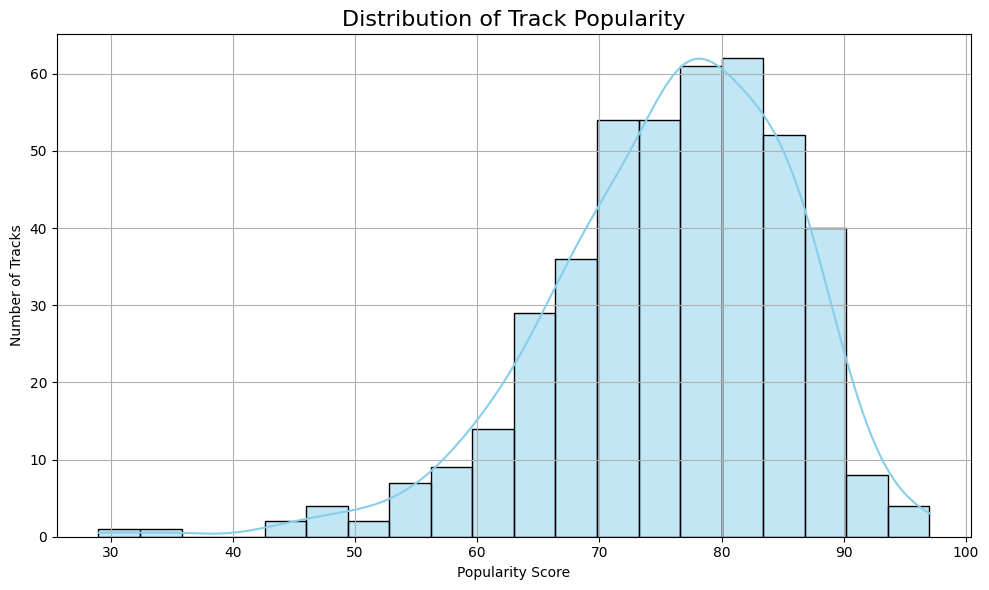

In [265]:
plt.figure(figsize=(10, 6))
sns.histplot(df4['Popularity'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity', fontsize=16)
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Ques.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

In [267]:
df4.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

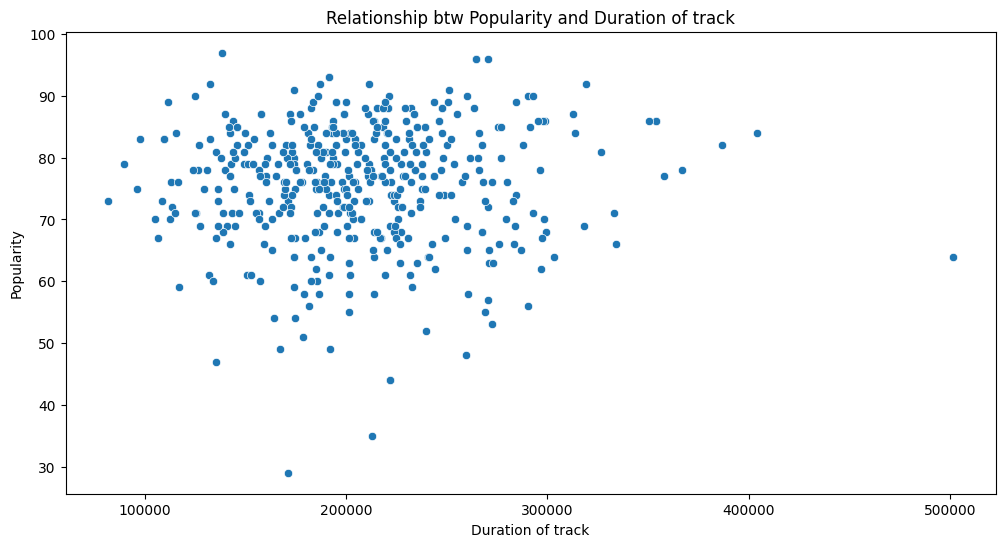

In [270]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'Popularity', x ='Duration (ms)', data = df4, palette = 'coolwarm')
plt.title('Relationship btw Popularity and Duration of track')
plt.xlabel("Duration of track")
plt.ylabel("Popularity")
plt.show()

1. No strong Correlation.
The data points are widely scattered. No clear upward or downward trend.
2. Very Long Tracks Aren't More Popular


#### Ques. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

In [272]:
df4.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

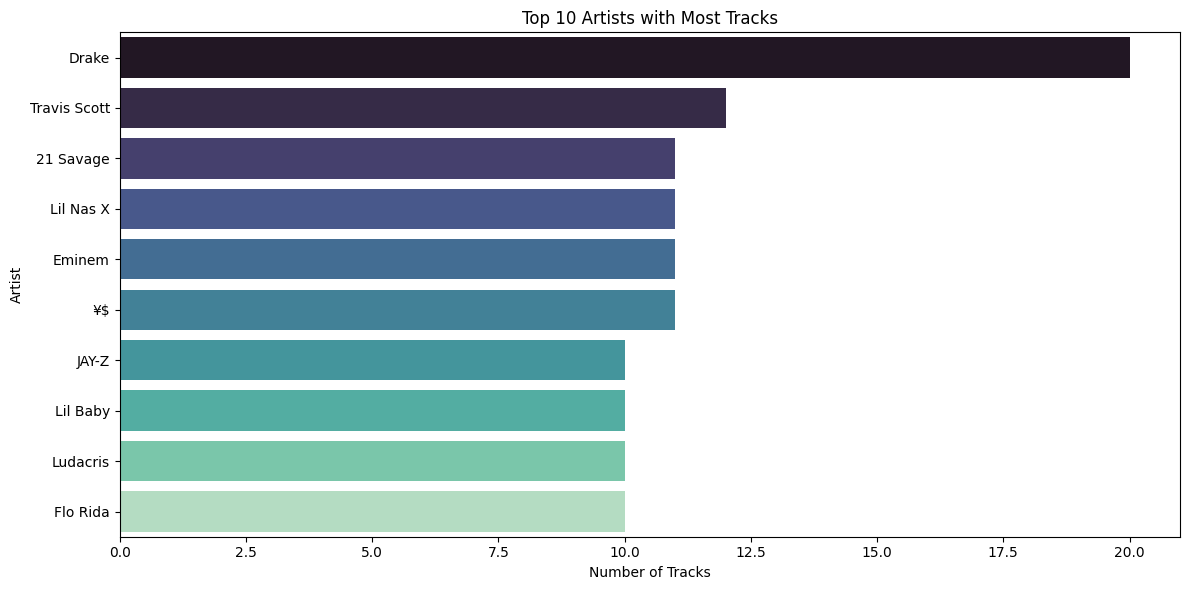

In [279]:
top_artist = df4['Artist'].value_counts().head(10).reset_index()
top_artist.columns = ['Artist', 'Track Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_artist, x='Track Count', y='Artist', palette='mako')

plt.title('Top 10 Artists with Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

#### Ques.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [280]:
df4.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [288]:
least_popular = df4.sort_values(by = 'Popularity', ascending = True).reset_index().head(5)
least_popular_tracks = least_popular[['Artist', 'Track Name', 'Popularity']]
least_popular_tracks


Artist                     Track Name  Popularity
0          Pressa  Attachments (feat. Coi Leray)          29
1   Justin Bieber                     Intentions          35
2  French Montana                Splash Brothers          44
3  French Montana                Splash Brothers          44
4        Lil Baby                  On Me - Remix          47

#### Ques6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [303]:
artist_popularity = df4.groupby('Artist')['Popularity'].mean()

top_5_artists = artist_popularity.sort_values(ascending = False).head(5).reset_index()
top_5_artists.columns = ['Artist', 'Average Popularity']

top_5_artists

Artist  Average Popularity
0         cass√∂           92.000000
1        Trueno           89.000000
2  David Guetta           87.000000
3  Travis Scott           87.000000
4            ¬•$           86.090909

#### Ques.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.


In [310]:

top5_Artist = top_5_artists['Artist']
top5_Artist

0           cass√∂
1          Trueno
2    David Guetta
3    Travis Scott
4              ¬•$
Name: Artist, dtype: object

In [316]:
top_5_artists_df = df4[df4['Artist'].isin(top5_Artist)]
most_popular_tracks = top_5_artists_df.sort_values(['Artist', 'Popularity'], ascending = [True, False])

#For each artist, find the track with highest popularity>>
top_tracks_per_artist = most_popular_tracks.groupby('Artist').first().reset_index()

result = top_tracks_per_artist[['Artist', 'Track Name']]
result

Artist                    Track Name
0  David Guetta            Baby Don't Hurt Me
1  Travis Scott    FE!N (feat. Playboi Carti)
2        Trueno  Mamichula - con Nicki Nicole
3         cass√∂                         Prada
4            ¬•$                      CARNIVAL

#### Ques.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

In [317]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


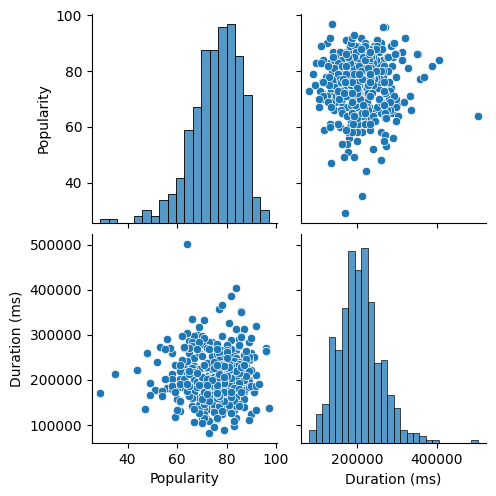

In [319]:
sns.pairplot(df4[['Popularity', 'Duration (ms)']])
plt.show()

#### Ques. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

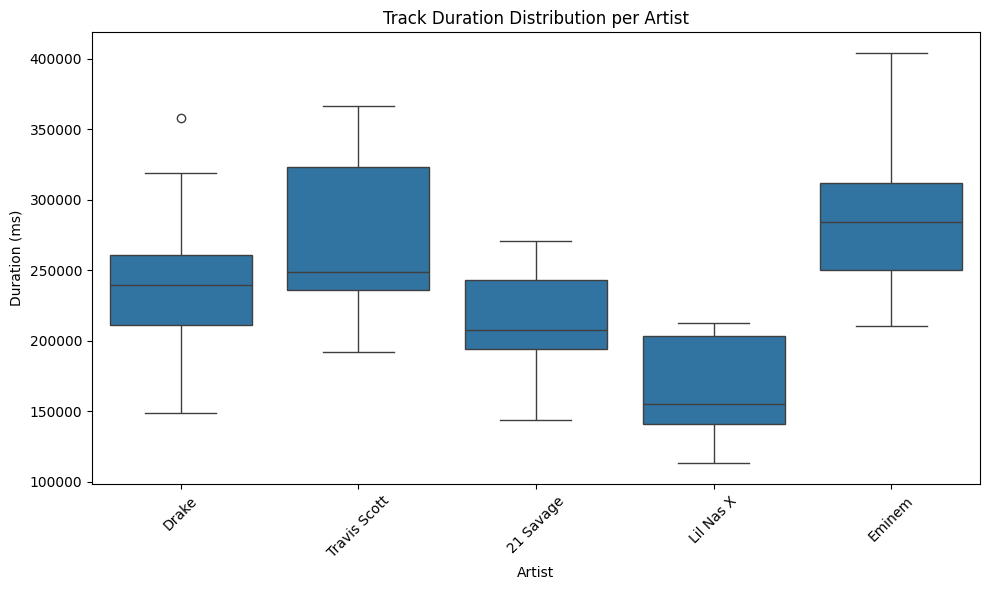

In [326]:
top_artists = df4['Artist'].value_counts().head(5).index
df_top = df4[df4['Artist'].isin(top_artists)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df_top)
plt.xticks(rotation=45)
plt.title('Track Duration Distribution per Artist')
plt.ylabel('Duration (ms)')
plt.xlabel('Artist')
plt.tight_layout()
plt.show()

In [327]:
df_top

Artist                                         Track Name  Popularity  \
0        Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)          92   
1        Drake                                          One Dance          91   
2        Drake                                 IDGAF (feat. Yeat)          90   
3        Drake               First Person Shooter (feat. J. Cole)          88   
4        Drake                      Jimmy Cooks (feat. 21 Savage)          88   
..         ...                                                ...         ...   
318  Lil Nas X                                            HOLIDAY          71   
319  Lil Nas X  Where Do We Go Now? (Music from Lil Nas X: Lon...          68   
410      Drake           Money In The Grave (Drake ft. Rick Ross)          79   
417      Drake   You Only Live Twice (with Lil Wayne & Rick Ross)          65   
427  21 Savage             Ghostface Killers (feat. Travis Scott)          73   

     Duration (ms)                Track ID  
0           319191  1yeB8MUNeLo9Ek1UEpsyz6  
1           173986  1zi7xx7UVEFkmKfv06H8x0  
2           260111  2YSzYUF3jWqb9YP9VXmpjE  
3           247444  7aqfrAY2p9BUSiupwk3svU  
4           218364  3F5CgOj3wFlRv51JsHbxhe  
..             ...                     ...  
318         154997  6zFMeegAMYQo0mt8rXtrli  
319         195470  0jeRoIMD1LHhUkQEbjkXQv  
410         205426  5ry2OE6R2zPQFDO85XkgRb  
417         213103  50ceCGZ3oD3U5caQV5bP6f  
427         268933  5u6vkDnOyaf8LsteDAj2ub  

[65 rows x 5 columns]

#### Ques. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

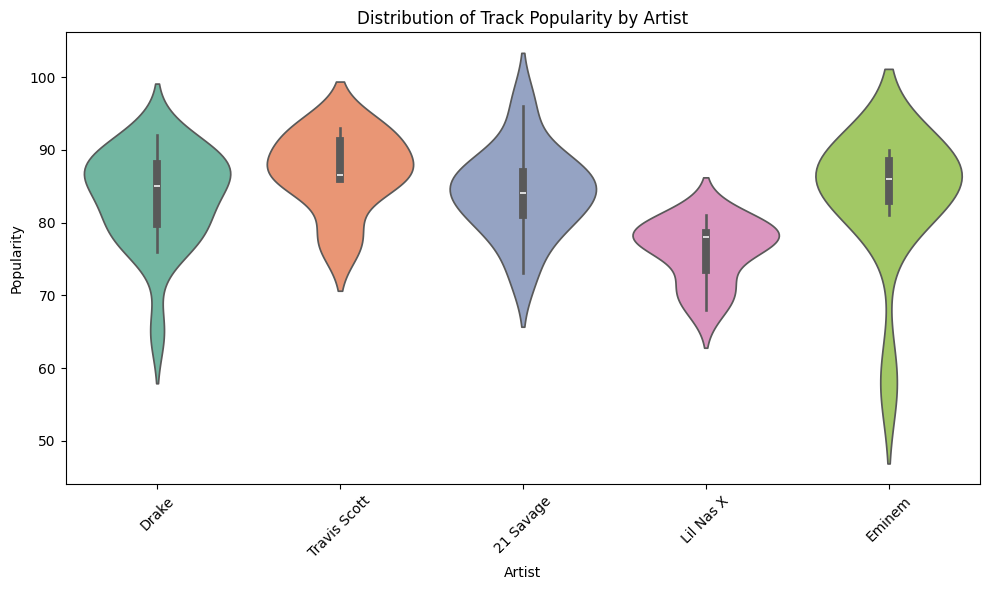

In [329]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Artist', y='Popularity', data=df_top, inner='box', palette='Set2')
plt.title('Distribution of Track Popularity by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
